# Aplicações práticas

# 2.16 Exercício 16: SCA_Imagem_Pão Zona

## A. Enunciado 

Uma empresa de fabrico de pão pretende saber como os diferentes tipos de pão são percecionados pelos consumidores nas zonas geográficas A e B. Para tal, recolheu uma amostra aleatória de 1710 famílias. A imagem do pão é classificada em 9 categorias: 1. Vegetarianos, 2. Pouco calórico, 3. Saudável, 4. Crianças/jovens, 5. Para gordos, 6. Idosos, 7. Popular, 8. Tradicional, 9. Rico; e os diferentes tipos de pão em 5 categorias: 1. Centeio, 2. Integral, 3. 7 Cereais, 4. Milho, 5. Trigo. Para facilitar a compreensão da associação entre as categorias das duas variáveis e criar o perfil dos consumidores por zonas, pretende-se a sua visualização num mapa perceptual, aplicando-se a Análise de Correspondência Simples (SCA). As variáveis ativas (Imagem e Pão) e as suplementares (Zona A e Zona B) são nominais, resultando em duas tabelas de contingência: uma 9x5 para as variáveis ativas, e uma 2x5 para as variáveis suplementares. Existem duas variáveis suplementares, o que é inferior ao máximo permitido de 3 (5 categorias em coluna - 2). Os dados estão disponíveis nas Tabelas 1 e 2, do ficheiro "cap02_exerc.16 Pão Imagem.sav" e também estão organizados em um dicionário em Python.








# Resolução em Python

## Carregando Bibliotecas

In [1]:
import pandas as pd  # Fornece DataFrames e Series para manipulação de dados em Python, facilitando operações como leitura, escrita, e manipulação de estruturas de dados tabulares.

In [2]:
# Ajustar opções de visualização
pd.set_option('display.max_rows', 100)  # Mostra até 100 linhas
pd.set_option('display.max_columns', 20)  # Mostra até 20 colunas

## Funções Personalizadas

In [3]:
import sys

# Adicionar o caminho do diretório ao sys.path
sys.path.append(r"C:\Users\ricar\OneDrive\Área de Trabalho\Livro\Cap_02\socialdataanalysis")

from association import gerar_tabela_contingencia
from association import complementar_tabela_contingencia_com_analise_estatistica
from association import plot_stacked_bar_chart
from association import realizar_analise_correspondencia
from association import detalhar_resultados_analise_correspondencia
from association import analise_correspondencia_e_grafico

## Dados Fornecidos

In [4]:
# Dicionário com dados categorizados representando grupos e suas frequências
dados = {
    'Imagem': [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 
               6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9],
    'Pão': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 
            1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'Freq': [1, 105, 1, 3, 119, 1, 12, 137, 93, 3, 1, 89, 1, 99, 15, 60, 7, 1, 2, 107, 49, 10, 7, 17, 26, 
             5, 1, 144, 92, 1, 96, 23, 2, 3, 73, 48, 1, 4, 4, 25, 19, 19, 104, 73, 7]
}

# Criando o DataFrame a partir do dicionário
dados = pd.DataFrame(dados)

# Convertendo as colunas para inteiros, se necessário
dados = dados.astype(int)

# Visualizando o dataframe
display(dados)

,Imagem,Pão,Freq
0,1,1,1
1,1,2,105
2,1,3,1
3,1,4,3
4,1,5,119
5,2,1,1
6,2,2,12
7,2,3,137
8,2,4,93
9,2,5,3


In [5]:
# Dicionário com dados categorizados representando grupos e suas frequências
dados_suple = {
    'Zona': [1, 1, 1, 1, 1, 2, 2, 2, 2, 2],
    'Pão': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5,],
    'Freq': [244, 67, 101, 86, 281, 36, 200, 300, 300, 95]
}

# Criando o DataFrame a partir do dicionário
dados_suple = pd.DataFrame(dados_suple)

# Convertendo as colunas para inteiros, se necessário
dados_suple = dados_suple.astype(int)

# Visualizando o dataframe
display(dados_suple)

,Zona,Pão,Freq
0,1,1,244
1,1,2,67
2,1,3,101
3,1,4,86
4,1,5,281
5,2,1,36
6,2,2,200
7,2,3,300
8,2,4,300
9,2,5,95


## Tabela 1: Tabela de Contingência

In [6]:
# Obter automaticamente os nomes dos grupos e da coluna de frequência
grupos = dados.columns[:-1].tolist()  # Todos exceto a última coluna
categorias = {
    grupos[0]: ['1. Vegetarianos', '2. Pouco calórico', '3. Saudável', '4. Crianças/jovens', '5. Para gordos',
        '6. Idosos', '7. Popular', '8. Tradicional', '9. Rico'],
    grupos[1]: ['1. Centeio', '2. Integral', '3. 7Cereais', '4. Milho', '5. Trigo'],
}

tabela_contingencia = gerar_tabela_contingencia(dados, grupos, categorias)

display(tabela_contingencia)

Pão,1. Centeio,2. Integral,3. 7Cereais,4. Milho,5. Trigo
Imagem,,,,,
1. Vegetarianos,1,105,1,3,119
2. Pouco calórico,1,12,137,93,3
3. Saudável,1,89,1,99,15
4. Crianças/jovens,60,7,1,2,107
5. Para gordos,49,10,7,17,26
6. Idosos,5,1,144,92,1
7. Popular,96,23,2,3,73
8. Tradicional,48,1,4,4,25
9. Rico,19,19,104,73,7


In [7]:
# Obter automaticamente os nomes dos grupos e da coluna de frequência
grupos_suple = dados_suple.columns[:-1].tolist()  # Todos exceto a última coluna
categorias_suple = {
    grupos_suple[0]: ['10. Zona A', '11. Zona B'],
    grupos_suple[1]: ['1. Centeio', '2. Integral', '3. 7Cereais', '4. Milho', '5. Trigo'],
}

tabela_contingencia_suple = gerar_tabela_contingencia(dados_suple, grupos_suple, categorias_suple)

display(tabela_contingencia_suple)

Pão,1. Centeio,2. Integral,3. 7Cereais,4. Milho,5. Trigo
Zona,,,,,
10. Zona A,244,67,101,86,281
11. Zona B,36,200,300,300,95


In [8]:
tabela_contingencia_combinada = pd.concat([tabela_contingencia, tabela_contingencia_suple], axis=0)

# Definindo o nome do índice e das colunas após a concatenação, se necessário
tabela_contingencia_combinada.index.name = tabela_contingencia.index.name
tabela_contingencia_combinada.columns.name = tabela_contingencia.columns.name

tabela_contingencia_combinada

Pão,1. Centeio,2. Integral,3. 7Cereais,4. Milho,5. Trigo
Imagem,,,,,
1. Vegetarianos,1,105,1,3,119
2. Pouco calórico,1,12,137,93,3
3. Saudável,1,89,1,99,15
4. Crianças/jovens,60,7,1,2,107
5. Para gordos,49,10,7,17,26
6. Idosos,5,1,144,92,1
7. Popular,96,23,2,3,73
8. Tradicional,48,1,4,4,25
9. Rico,19,19,104,73,7


<font color="blue">    
    
### 2.16.1. Explore os dados comparando:
</font>

<font color="blue">    
    
#### 2.16.1.1. As frequências observadas com as esperadas.
</font>

In [9]:
tabela_contingencia_calculos = complementar_tabela_contingencia_com_analise_estatistica(tabela_contingencia, incluir_residuos=False)
display(tabela_contingencia_calculos)

Pão                                1. Centeio 2. Integral 3. 7Cereais   
Imagem                                                                  
1. Vegetarianos    Count                  1.0       105.0         1.0  \
                   Expected Count        37.5        35.8        53.7   
                   % within Imagem        0.4        45.9         0.4   
                   % within Pão           0.4        39.3         0.2   
                   % of Total             0.1         6.1         0.1   
2. Pouco calórico  Count                  1.0        12.0       137.0   
                   Expected Count        40.3        38.4        57.7   
                   % within Imagem        0.4         4.9        55.7   
                   % within Pão           0.4         4.5        34.2   
                   % of Total             0.1         0.7         8.0   
3. Saudável        Count                  1.0        89.0         1.0   
                   Expected Count        33.6        32.0        48.1   
                   % within Imagem        0.5        43.4         0.5   
                   % within Pão           0.4        33.3         0.2   
                   % of Total             0.1         5.2         0.1   
4. Crianças/jovens Count                 60.0         7.0         1.0   
                   Expected Count        29.0        27.6        41.5   
                   % within Imagem       33.9         4.0         0.6   
                   % within Pão          21.4         2.6         0.2   
                   % of Total             3.5         0.4         0.1   
5. Para gordos     Count                 49.0        10.0         7.0   
                   Expected Count        17.8        17.0        25.6   
                   % within Imagem       45.0         9.2         6.4   
                   % within Pão          17.5         3.7         1.7   
                   % of Total             2.9         0.6         0.4   
6. Idosos          Count                  5.0         1.0       144.0   
                   Expected Count        39.8        37.9        57.0   
                   % within Imagem        2.1         0.4        59.3   
                   % within Pão           1.8         0.4        35.9   
                   % of Total             0.3         0.1         8.4   
7. Popular         Count                 96.0        23.0         2.0   
                   Expected Count        32.3        30.8        46.2   
                   % within Imagem       48.7        11.7         1.0   
                   % within Pão          34.3         8.6         0.5   
                   % of Total             5.6         1.3         0.1   
8. Tradicional     Count                 48.0         1.0         4.0   
                   Expected Count        13.4        12.8        19.2   
                   % within Imagem       58.5         1.2         4.9   
                   % within Pão          17.1         0.4         1.0   
                   % of Total             2.8         0.1         0.2   
9. Rico            Count                 19.0        19.0       104.0   
                   Expected Count        36.4        34.7        52.1   
                   % within Imagem        8.6         8.6        46.8   
                   % within Pão           6.8         7.1        25.9   
                   % of Total             1.1         1.1         6.1   
Total              Count                280.0       267.0       401.0   
                   Expected Count       280.0       267.0       401.0   
                   % within Imagem       16.4        15.6        23.5   
                   % within Pão         100.0       100.0       100.0   
                   % of Total            16.4        15.6        23.5   

Pão                                4. Milho 5. Trigo   Total  
Imagem                                                        
1. Vegetarianos    Count                3.0    119.0   229.0  
              

<font color="blue">    
    
#### 2.16.1.2. As percentagens em linha de cada categoria com a média global.
</font>

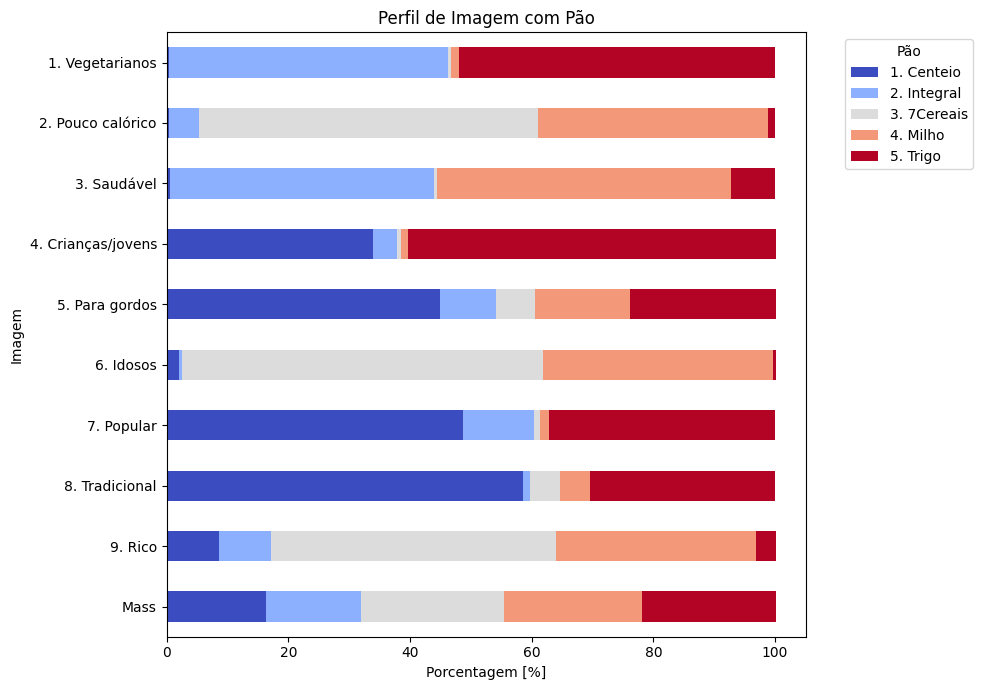

,1. Centeio,2. Integral,3. 7Cereais,4. Milho,5. Trigo
1. Vegetarianos,0.004,0.459,0.004,0.013,0.520
2. Pouco calórico,0.004,0.049,0.557,0.378,0.012
3. Saudável,0.005,0.434,0.005,0.483,0.073
4. Crianças/jovens,0.339,0.040,0.006,0.011,0.605
5. Para gordos,0.450,0.092,0.064,0.156,0.239
6. Idosos,0.021,0.004,0.593,0.379,0.004
7. Popular,0.487,0.117,0.010,0.015,0.371
8. Tradicional,0.585,0.012,0.049,0.049,0.305
9. Rico,0.086,0.086,0.468,0.329,0.032
Mass,0.164,0.156,0.235,0.226,0.220


In [10]:
plot_stacked_bar_chart(tabela_contingencia_calculos, show_table=True)

<font color="blue">    
    
### 2.16.2. Determine a qualidade do modelo:
</font>


<font color="blue">    
    
#### 2.16.2.1. Variância explicada e número de dimensões
</font>

<font color="blue">    
    
#### 2.16.2.2. Teste do Qui-Quadrado
</font>

In [11]:
realizar_analise_correspondencia(tabela_contingencia)

Dimension,Singular Value,Inertia,Chi Square,Sig.,Proportion of Inertia,Proportion of Inertia Cumulative
1,0.834,0.696,,,0.620,0.620
2,0.562,0.316,,,0.281,0.901
3,0.311,0.097,,,0.086,0.987
4,0.120,0.014,,,0.013,1.000
Total,,1.123,1920.265,0.000,,


<font color="blue">    
    
#### 2.16.2.3. Desvios padrões e as correlações entre as dimensões
</font>

<font color="blue">    
    
### 2.16.3. Intensidade da associação das categorias por dimensão: definição das dimensões
</font>

In [12]:
detalhar_resultados_analise_correspondencia(tabela_contingencia, n_components=2, focus='row', df_supplement=None)

,Mass,Score in Dimension 1,Score in Dimension 2,Inertia,Contribution of Point to Inertia of Dimension 1,Contribution of Point to Inertia of Dimension 2,Contribution of Dimension 1 to Inertia of Point,Contribution of Dimension 2 to Inertia of Point,Total Contribution to Inertia
1. Vegetarianos,0.134,-0.759,0.899,0.211,0.111,0.342,0.366,0.512,0.878
2. Pouco calórico,0.144,0.969,-0.126,0.140,0.194,0.007,0.967,0.016,0.983
3. Saudável,0.120,0.157,0.947,0.152,0.004,0.341,0.020,0.710,0.729
4. Crianças/jovens,0.104,-1.033,-0.364,0.142,0.159,0.043,0.776,0.096,0.872
5. Para gordos,0.064,-0.561,-0.464,0.043,0.029,0.043,0.468,0.320,0.788
6. Idosos,0.142,1.023,-0.255,0.161,0.214,0.029,0.923,0.057,0.980
7. Popular,0.115,-0.946,-0.471,0.134,0.148,0.081,0.769,0.191,0.959
8. Tradicional,0.048,-0.855,-0.829,0.074,0.050,0.104,0.476,0.448,0.924
9. Rico,0.130,0.697,-0.141,0.066,0.091,0.008,0.951,0.039,0.990


In [13]:
detalhar_resultados_analise_correspondencia(tabela_contingencia, n_components=2, focus='column')

,Mass,Score in Dimension 1,Score in Dimension 2,Inertia,Contribution of Point to Inertia of Dimension 1,Contribution of Point to Inertia of Dimension 2,Contribution of Dimension 1 to Inertia of Point,Contribution of Dimension 2 to Inertia of Point,Total Contribution to Inertia
1. Centeio,0.164,-0.867,-0.838,0.261,0.177,0.364,0.472,0.440,0.911
2. Integral,0.156,-0.338,1.036,0.192,0.026,0.530,0.093,0.873,0.966
3. 7Cereais,0.235,1.022,-0.331,0.292,0.352,0.081,0.839,0.088,0.927
4. Milho,0.226,0.716,0.174,0.149,0.166,0.022,0.776,0.046,0.822
5. Trigo,0.220,-0.939,0.063,0.229,0.279,0.003,0.848,0.004,0.852


In [14]:
analise_correspondencia_e_grafico(tabela_contingencia, x_component=0, y_component=1)

alt.LayerChart(...)